In [1]:
import pandas as pd
import numpy as np
import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score,explained_variance_score
import sklearn.model_selection

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

from math import sqrt
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import split_scale



In [2]:
df = pd.read_csv('query_result.csv')

In [3]:
df

,parcelid,propertylandusetypeid,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,bedroomcnt,bathroomcnt,transactiondate,fips
0,11289917,261,1458,2319.90,136104,3,2.0,2017-06-23,6037
1,11705026,261,1421,543.69,35606,2,1.0,2017-06-30,6037
2,14269464,261,2541,9819.72,880456,4,3.0,2017-06-01,6059
3,11389003,261,1650,7673.19,614000,3,2.0,2017-06-01,6037
4,11967869,261,693,3267.47,274237,2,1.0,2017-06-29,6037
...,...,...,...,...,...,...,...,...,...
14985,14339902,261,2526,5718.72,458903,5,3.0,2017-06-30,6059
14986,13940564,261,2735,1465.88,115387,5,3.0,2017-06-30,6059
14987,12945108,261,1536,3519.78,297097,3,2.0,2017-06-30,6037
14988,14214719,261,2655,8065.50,746963,5,3.0,2017-06-30,6059


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14990 entries, 0 to 14989
Data columns (total 9 columns):
parcelid                        14990 non-null int64
propertylandusetypeid           14990 non-null int64
calculatedfinishedsquarefeet    14990 non-null int64
taxamount                       14989 non-null float64
taxvaluedollarcnt               14990 non-null int64
bedroomcnt                      14990 non-null int64
bathroomcnt                     14990 non-null float64
transactiondate                 14990 non-null object
fips                            14990 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [5]:
df.astype({'fips': 'str'}).dtypes

parcelid                          int64
propertylandusetypeid             int64
calculatedfinishedsquarefeet      int64
taxamount                       float64
taxvaluedollarcnt                 int64
bedroomcnt                        int64
bathroomcnt                     float64
transactiondate                  object
fips                             object
dtype: object

In [6]:
df.head()

,parcelid,propertylandusetypeid,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,bedroomcnt,bathroomcnt,transactiondate,fips
0,11289917,261,1458,2319.90,136104,3,2.0,2017-06-23,6037
1,11705026,261,1421,543.69,35606,2,1.0,2017-06-30,6037
2,14269464,261,2541,9819.72,880456,4,3.0,2017-06-01,6059
3,11389003,261,1650,7673.19,614000,3,2.0,2017-06-01,6037
4,11967869,261,693,3267.47,274237,2,1.0,2017-06-29,6037


In [7]:
df = df.rename(columns={'calculatedfinishedsquarefeet': 'square_feet', 'taxamount':'taxes', 'fips':'FIPS', 'taxvaluedollarcnt':'home_value', 'bedroomcnt':'bedroom_count', 'bathroomcnt':'bathroom_count'})

In [8]:
df = df.drop(columns=['propertylandusetypeid', 'parcelid', 'transactiondate'])
df

,square_feet,taxes,home_value,bedroom_count,bathroom_count,FIPS
0,1458,2319.90,136104,3,2.0,6037
1,1421,543.69,35606,2,1.0,6037
2,2541,9819.72,880456,4,3.0,6059
3,1650,7673.19,614000,3,2.0,6037
4,693,3267.47,274237,2,1.0,6037
...,...,...,...,...,...,...
14985,2526,5718.72,458903,5,3.0,6059
14986,2735,1465.88,115387,5,3.0,6059
14987,1536,3519.78,297097,3,2.0,6037
14988,2655,8065.50,746963,5,3.0,6059


In [9]:
df.home_value.isnull().sum()

0

In [10]:
df[df['home_value'].isnull()].index.tolist()

[]

In [11]:
df = df.dropna()
df

,square_feet,taxes,home_value,bedroom_count,bathroom_count,FIPS
0,1458,2319.90,136104,3,2.0,6037
1,1421,543.69,35606,2,1.0,6037
2,2541,9819.72,880456,4,3.0,6059
3,1650,7673.19,614000,3,2.0,6037
4,693,3267.47,274237,2,1.0,6037
...,...,...,...,...,...,...
14985,2526,5718.72,458903,5,3.0,6059
14986,2735,1465.88,115387,5,3.0,6059
14987,1536,3519.78,297097,3,2.0,6037
14988,2655,8065.50,746963,5,3.0,6059


- Two different forms of data validation

In [12]:
assert (df['square_feet'] == 0).sum() < 1 , "There are zeros in this column. Handle them before proceeding"
assert (df['taxes'] == 0).sum() < 1 , "There are zeros in this column. Handle them before proceeding"
assert (df['home_value'] == 0).sum() < 1 , "There are zeros in this column. Handle them before proceeding"
assert (df['bedroom_count'] == 0).sum() < 1 , "There are zeros in this column. Handle them before proceeding"
assert (df['bathroom_count'] == 0).sum() < 1 , "There are zeros in this column. Handle them before proceeding"


In [13]:
df.isnull().sum()

square_feet       0
taxes             0
home_value        0
bedroom_count     0
bathroom_count    0
FIPS              0
dtype: int64

In [14]:
# fips = pd.read_clipboard()

In [15]:
# fips

In [16]:
# fips.to_csv('fips.csv', index = False) 

In [17]:
fips = pd.read_csv('fips.csv')

In [18]:
fips

,FIPS,Name,State
0,1001,Autauga,AL
1,1003,Baldwin,AL
2,1005,Barbour,AL
3,1007,Bibb,AL
4,1009,Blount,AL
...,...,...,...
3227,72151,Yabucoa,PR
3228,72153,Yauco,PR
3229,78010,St. Croix,VI
3230,78020,St. John,VI


In [19]:
fips = fips.rename(columns={'Name': 'County'})

In [20]:
df = df.merge(fips, left_on = 'FIPS', right_on = 'FIPS')

In [21]:
df

,square_feet,taxes,home_value,bedroom_count,bathroom_count,FIPS,County,State
0,1458,2319.90,136104,3,2.0,6037,Los Angeles,CA
1,1421,543.69,35606,2,1.0,6037,Los Angeles,CA
2,1650,7673.19,614000,3,2.0,6037,Los Angeles,CA
3,693,3267.47,274237,2,1.0,6037,Los Angeles,CA
4,1108,5990.50,486866,3,2.0,6037,Los Angeles,CA
...,...,...,...,...,...,...,...,...
14984,1575,5417.50,506000,3,2.0,6111,Ventura,CA
14985,1645,2855.78,230986,3,2.0,6111,Ventura,CA
14986,1308,2788.68,255407,3,2.0,6111,Ventura,CA
14987,2314,9549.08,485364,4,2.5,6111,Ventura,CA


In [22]:
df["tax_rate"] = df["taxes"] / df["home_value"]
df

,square_feet,taxes,home_value,bedroom_count,bathroom_count,FIPS,County,State,tax_rate
0,1458,2319.90,136104,3,2.0,6037,Los Angeles,CA,0.017045
1,1421,543.69,35606,2,1.0,6037,Los Angeles,CA,0.015270
2,1650,7673.19,614000,3,2.0,6037,Los Angeles,CA,0.012497
3,693,3267.47,274237,2,1.0,6037,Los Angeles,CA,0.011915
4,1108,5990.50,486866,3,2.0,6037,Los Angeles,CA,0.012304
...,...,...,...,...,...,...,...,...,...
14984,1575,5417.50,506000,3,2.0,6111,Ventura,CA,0.010707
14985,1645,2855.78,230986,3,2.0,6111,Ventura,CA,0.012363
14986,1308,2788.68,255407,3,2.0,6111,Ventura,CA,0.010919
14987,2314,9549.08,485364,4,2.5,6111,Ventura,CA,0.019674


In [23]:
df.County.value_counts()

Los Angeles    9604
Orange         4094
Ventura        1291
Name: County, dtype: int64

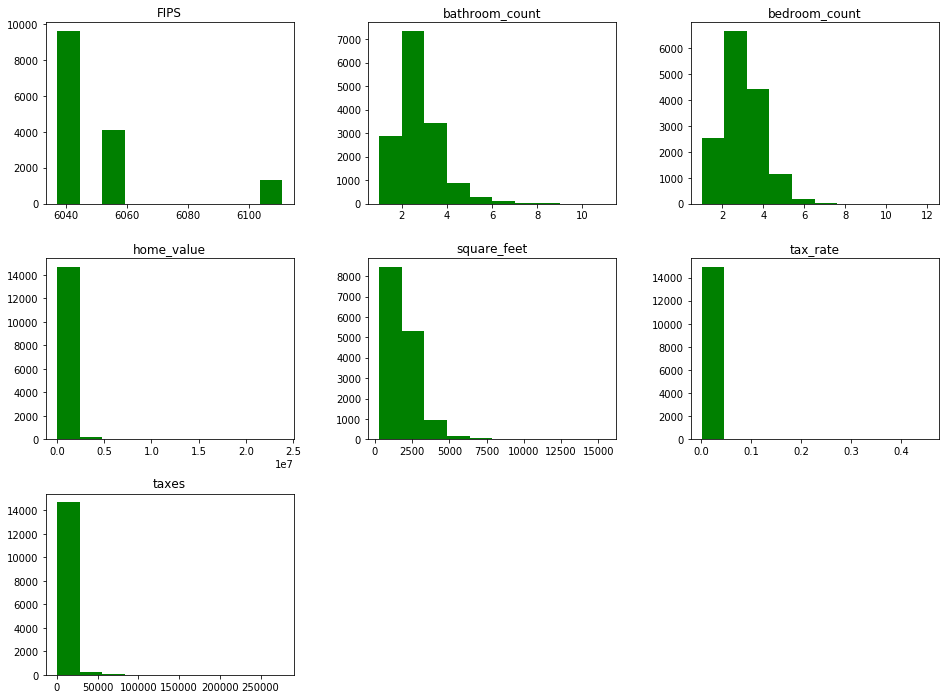

In [24]:
df.hist(grid=False, figsize=(16,12), color='green')
plt.show()

In [ ]:
sns.pairplot(df, kind="reg")
plt.show()

In [ ]:
df.corr(method ='pearson') 

In [ ]:
filt = df['County'] == 'Los Angeles'
LAC = df[filt]
LAC = LAC[['County', 'tax_rate']]
LAC.tax_rate.max()

In [ ]:
LAC.plot.hist(grid=True, bins=15, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Tax Rates for Los Angeles')
plt.xlabel('Tax Rates')
plt.ylabel('Number of Homes')
plt.grid(axis='y', alpha=0.75)

In [ ]:
sns.distplot(LAC.tax_rate)

In [ ]:
filt2 = df['County'] == 'Orange'
OC = df[filt]
OC = LAC[['County', 'tax_rate']]
OC.tax_rate.max()

In [ ]:
sns.distplot(OC.tax_rate)

In [ ]:
filt2 = df['County'] == 'Ventura'
VC = df[filt]
VC = LAC[['County', 'tax_rate']]
VC.tax_rate.max()

In [ ]:
sns.distplot(VC.tax_rate)

In [ ]:
def split_my_data(df, train_pct=0.70, seed=123):
    train, test = train_test_split(df, train_size=train_pct, random_state=seed)
    return train, test

In [ ]:
train, test = split_my_data(df)

In [ ]:
X_train = train[['square_feet', 'bedroom_count', 'bathroom_count']]
X_test = test[['square_feet', 'bedroom_count', 'bathroom_count']]
y_train = train[['home_value']]
y_test = test[['home_value']]

In [ ]:
model_df = y_train.copy()

In [ ]:
model_df.head()

In [ ]:
model_df = model_df.rename(columns={'home_value':'actual'})
model_df

In [ ]:
model_df['yhat_bl'] = model_df['actual'].mean()
model_df.head()

In [ ]:
ols_model = ols(formula='home_value ~ bedroom_count + bathroom_count + square_feet', data=train).fit()

In [ ]:
model_df['ols_prediction'] = ols_model.predict(X_train)


In [ ]:
# pd.options.display.float_format = '{:.3f}'.format

In [ ]:
model_df.head()

In [ ]:
X, y = train[['bedroom_count' , 'bathroom_count', 'square_feet']], train.home_value

lm = sklearn.linear_model.LinearRegression().fit(X, y)
model_df['lm_predictions'] = lm.predict(X)

In [ ]:
model_df['residual_mean'] = model_df.ols_prediction - model_df.actual

In [ ]:
model_df

In [ ]:
model_df['residual_bl'] = model_df['yhat_bl'] - model_df['actual']
model_df

In [ ]:
model_df['residual_lm'] = model_df['lm_predictions'] - model_df['actual']
model_df

In [ ]:
mse_ols = mse(model_df.actual, model_df.ols_prediction)
mse_bl = mse(model_df.actual, model_df.yhat_bl)

mse_ols < mse_bl 


In [ ]:
ols_r2 = round(ols_model.rsquared,3)
ols_r2

In [ ]:
ols_p_value = ols_model.f_pvalue
ols_p_value